# <font color="red">Importing Libraries</font>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc,confusion_matrix
from sklearn.svm import SVC
from prettytable import PrettyTable
import pickle

# <font color="red">Loading the Dataset & EDA</font>

In [3]:
bank_note_df = pd.read_csv("BankNote_Authentication.csv")

# printing first 5 rows for preview
bank_note_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
# we have 4 columns for 4 features and a column for class labels

# Note: 1 indicates fake notes and 0 indicates non-counterfeit notes

-------------------------------------------------
No. of points with class=0 --> 762
No. of points with class=1 --> 610
-------------------------------------------------


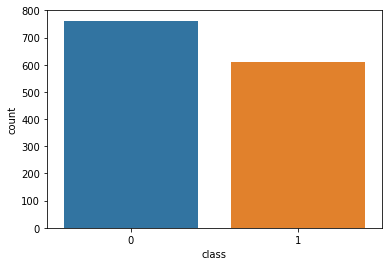

In [15]:
cnts = bank_note_df['class'].value_counts()
print("-------------------------------------------------")
print(f"No. of points with class=0 --> {cnts[0]}")
print(f"No. of points with class=1 --> {cnts[1]}")
print("-------------------------------------------------")
ax = sns.countplot(x="class",data=bank_note_df)

In [ ]:
# both the classes have nearly same number of points
# Hence, we don't have a problem of imblanaced dataset

In [16]:
bank_note_df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

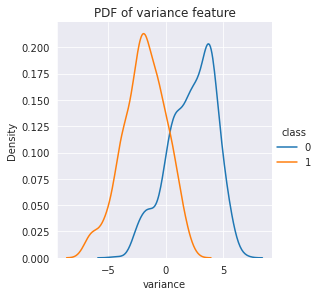

In [24]:
sns.set_style("darkgrid")
sns.FacetGrid(bank_note_df, hue="class", height=4).map(sns.kdeplot, "variance").add_legend()
plt.title("PDF of variance feature")
plt.show()

In [ ]:
# Observations:-
# About 21% fake notes have variance of about -3
# About 20.5% real notes have variance of about 3.5
# Variance feature is a good separator b/w the 2 classes

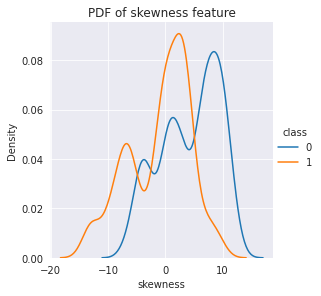

In [25]:
sns.set_style("darkgrid")
sns.FacetGrid(bank_note_df, hue="class", height=4).map(sns.kdeplot, "skewness").add_legend()
plt.title("PDF of skewness feature")
plt.show()

In [ ]:
# Observations:-
# About 9% fake notes have skewness close to 2
# About 8.2% real notes have skewness close to 10
# Skewness feature is also a fairly good separator b/w the 2 classes

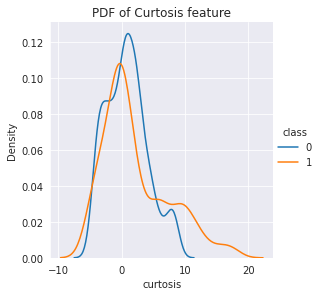

In [27]:
sns.set_style("darkgrid")
sns.FacetGrid(bank_note_df, hue="class", height=4).map(sns.kdeplot, "curtosis").add_legend()
plt.title("PDF of Curtosis feature")
plt.show()

In [ ]:
# Observations:-
# About 11% points fake notes have curtosis around 0
# About 13% real notes have curtosis around 1
# Curtosis feature is not a very good separator b/w the 2 classes

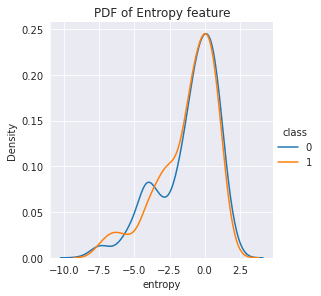

In [28]:
sns.set_style("darkgrid")
sns.FacetGrid(bank_note_df, hue="class", height=4).map(sns.kdeplot, "entropy").add_legend()
plt.title("PDF of Entropy feature")
plt.show()

In [ ]:
# Observations:-
# About 24% of both fake and real notes have entropy = 0
# Entropy feature is not at all a good separator b/w the 2 classes

In [ ]:
# We saw, variance and skewness will help us to distinguish b/w real and fake notes to a greater extent as compared to curtosis and entropy features
# Let's go ahead with the analyss of Box Plots & Violin Plots for all 4 features

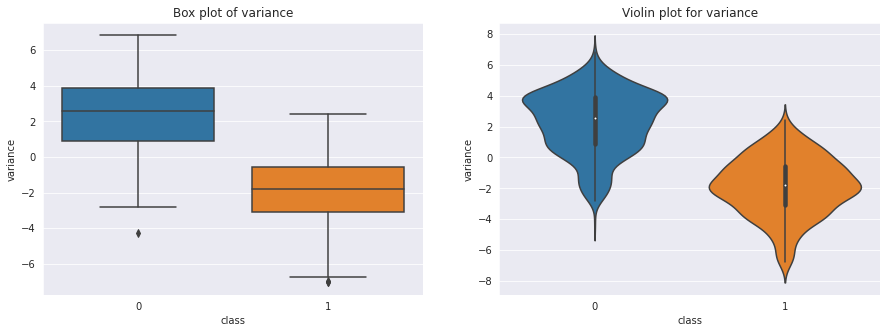

In [39]:
plt.subplots(figsize=(15, 5))

plt.subplot(1,2,1)
sns.boxplot(x="class", y="variance", data=bank_note_df)
plt.title("Box plot of variance")

plt.subplot(1,2,2)
sns.violinplot(x="class", y="variance", data=bank_note_df)
plt.title("Violin plot for variance")

plt.show()

In [ ]:
# Observations:-
# From Box Plot
# 50th percentile value of variance for real notes is about 3.5
# 50th percentile value of variance for fake notes is about -1.9
# there are very few outliers as indicated by the black dots outside the whiskers of Box Plot

# From Violin Plot
# Most of the real notes have variance value of around 2 to 6
# Most of the fake notes have variance value of around -5 to 2

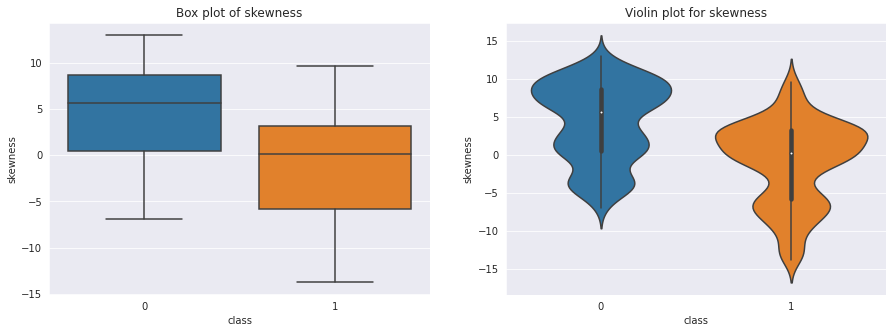

In [37]:
plt.subplots(figsize=(15, 5))

plt.subplot(1,2,1)
sns.boxplot(x="class", y="skewness", data=bank_note_df)
plt.title("Box plot of skewness")

plt.subplot(1,2,2)
sns.violinplot(x="class", y="skewness", data=bank_note_df)
plt.title("Violin plot for skewness")

plt.show()

In [ ]:
# Observations:-
# From Box Plot
# 50th percentile value of skewness for real notes is about 6
# 50th percentile value of skewness for fake notes is about 0
# there are no outliers

# From Violin Plot
# Most of the real notes have skewness value of around 7-10
# Most of the fake notes have skewness value of around 0-5

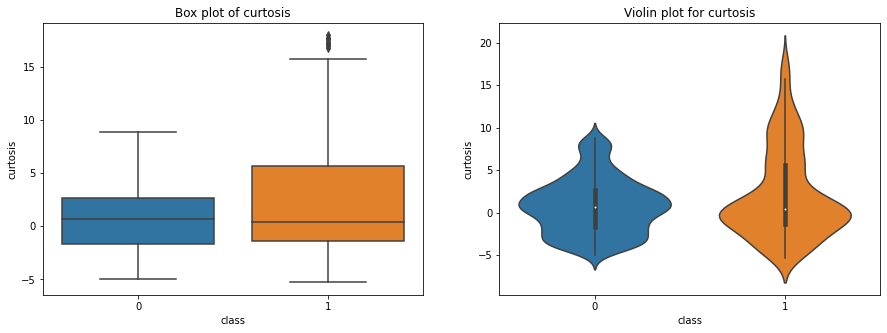

In [10]:
plt.subplots(figsize=(15, 5))

plt.subplot(1,2,1)
sns.boxplot(x="class", y="curtosis", data=bank_note_df)
plt.title("Box plot of curtosis")

plt.subplot(1,2,2)
sns.violinplot(x="class", y="curtosis", data=bank_note_df)
plt.title("Violin plot for curtosis")

plt.show()

In [ ]:
# Observations:-
# From Box Plot
# 50th percentile value of curtosis for real notes is about 1
# 50th percentile value of curtosis for fake notes is also about 1
# there are no outliers

# From Violin Plot
# Most of the real notes have curtosis value of around -5 to 5
# Most of the fake notes have curtosis value of also around -5 to 5

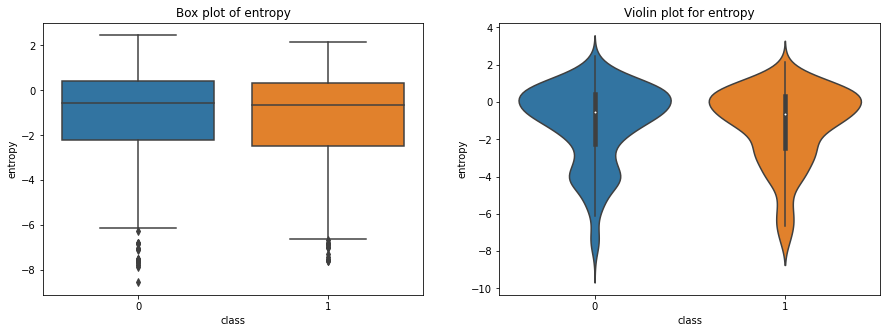

In [11]:
plt.subplots(figsize=(15, 5))

plt.subplot(1,2,1)
sns.boxplot(x="class", y="entropy", data=bank_note_df)
plt.title("Box plot of entropy")

plt.subplot(1,2,2)
sns.violinplot(x="class", y="entropy", data=bank_note_df)
plt.title("Violin plot for entropy")

plt.show()

In [ ]:
# Observations:-
# From Box Plot
# 50th percentile value of skewness for real notes is about 0.5
# 50th percentile value of variance for fake notes is also about 0.5
# there are no outliers

# From Violin Plot
# Most of the real notes have skewness value of around -2 to 2
# Most of the fake notes have skewness value of also around -2 to 2

Note: Observations from Box and Violin plots of Both real and Fakse notes also tell us that these 2 features won't help much in distinguishing b/w each other

# <font color="red">Pre-processing the Data</font>

In [4]:
print(f"Shape of our dataframe= {bank_note_df.shape}")
Y = bank_note_df['class']
print(f"Shape of Y= {Y.shape}")
X = bank_note_df.drop(columns=['class'],axis=1)
print(f"Shape of X= {X.shape}")

Shape of our dataframe= (1372, 5)
Shape of Y= (1372,)
Shape of X= (1372, 4)


In [5]:
# train-test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [6]:
# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <font color="red">Model</font>

In [54]:
# defining a re-usable func to plot heatmap confusion matrices:-
# credits:https://github.com/shashimanyam/DECISION-TREE-ON-DONORSCHOOSE-DATASET/blob/master/DECISION%20TREE%20ON%20DONORSCHOOSE.ipynb
def roc_curve_confusion_matrix(classifier):
  Y_train_probscores = classifier.predict_proba(X_train_scaled)[:,1]
  Y_test_probscores = classifier.predict_proba(X_test_scaled)[:,1]

  train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, Y_train_probscores)
  test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, Y_test_probscores)

  auc_train=auc(train_fpr, train_tpr)       # best AUC score for train set using the best parameters we obtained
  auc_test=auc(test_fpr, test_tpr)       # best AUC score for test set using the best parameters we obtained

  plt.plot(train_fpr, train_tpr, label="train AUC= "+str( auc_train ))
  plt.plot(test_fpr, test_tpr, label="test AUC= "+str( auc_test ))
  plt.legend()
  plt.title("ROC curve for train & test sets")
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.grid()
  plt.show()
  
  print("------------------------------------------------------------------------------")

  print("                                    Train & Test Confusion Matrices")
  train_cm = confusion_matrix( Y_train, classifier.predict(X_train_scaled) )
  test_cm = confusion_matrix( Y_test, classifier.predict(X_test_scaled) )

  key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
  fig, ax = plt.subplots(1,2, figsize=(15,5))

  labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) 
                  for key, value in zip(key.flatten(), train_cm.flatten())])).reshape(2,2)
  labels_test =  (np.asarray(["{0} = {1:.2f}" .format(key, value) 
                  for key, value in zip(key.flatten(),test_cm.flatten())])).reshape(2,2)

  sns.heatmap(train_cm, linewidths=.5, 
              xticklabels=['PREDICTED : 0', 'PREDICTED : 1'],
              yticklabels=['ACTUAL : 0', 'ACTUAL : 1'], 
              annot = labels_train, fmt = '', ax=ax[0])
  sns.heatmap(test_cm, linewidths=.5, 
              xticklabels=['PREDICTED : 0', 'PREDICTED : 1'],
              yticklabels=['ACTUAL : 0', 'ACTUAL : 1'], 
              annot = labels_test, fmt = '', ax=ax[1])

  ax[0].set_title('Train Set')
  ax[1].set_title('Test Set')

  plt.show()

## <font color="red">KNN</font>

In [74]:
neigh = KNeighborsClassifier()
params = {'n_neighbors':[3,5,6]}
clf = GridSearchCV(estimator=neigh,
                   param_grid=params,
                   scoring='f1')
clf.fit(X_train_scaled,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 6]}, scoring='f1')

In [75]:
print(f"The best hyper-parameter n_neighbors= {clf.best_params_['n_neighbors']} gave us the best f1-score= {clf.best_score_}")

The best hyper-parameter n_neighbors= 6 gave us the best f1-score= 0.9988571428571429


In [76]:
# Let's now test our model using the best hyper-parameter value obtained above:-
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled,Y_train)

KNeighborsClassifier(n_neighbors=3)

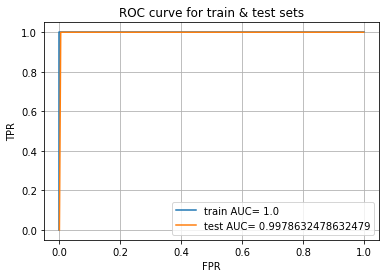

------------------------------------------------------------------------------
                                    Train & Test Confusion Matrices


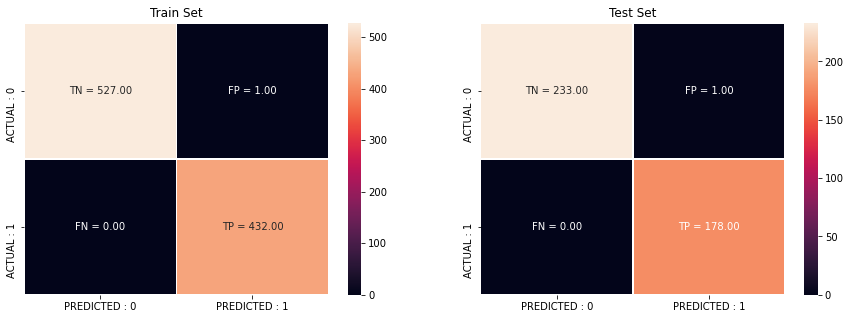

In [77]:
roc_curve_confusion_matrix(neigh)

In [ ]:
# Wow! We've got an amazing auc score!

## <font color="red">Log Reg using SGDClassifier</font>

In [78]:
sgd = SGDClassifier(loss="log")
params = {'alpha':[0.0001,0.01,0.1,1,10]}
clf = GridSearchCV(estimator=sgd,
                   param_grid=params,
                   scoring='f1')
clf.fit(X_train_scaled,Y_train)

GridSearchCV(estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': [0.0001, 0.01, 0.1, 1, 10]}, scoring='f1')

In [79]:
clf.best_params_

{'alpha': 0.0001}

In [80]:
print(f"The best hyper-parameters alpha= {clf.best_params_['alpha']} gave us the best f1-score= {clf.best_score_}")

The best hyper-parameters alpha= 0.0001 gave us the best f1-score= 0.9850354833524968


In [81]:
# Let's now test our model using the best hyper-parameter value obtained above:-
sgd = SGDClassifier(alpha=0.0001,loss='log')
sgd.fit(X_train_scaled,Y_train)

SGDClassifier(loss='log')

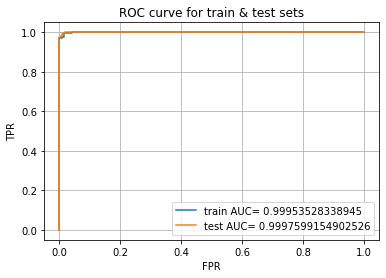

------------------------------------------------------------------------------
                                    Train & Test Confusion Matrices


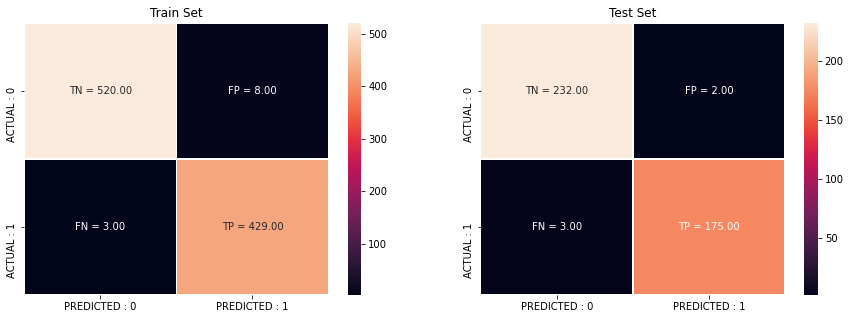

In [82]:
roc_curve_confusion_matrix(sgd)

In [ ]:
# a good score this time

## <font color="red">SVC</font>

In [84]:
svc = SVC()
params = {'C':[0.1,0.01,1,10],'kernel':('linear','rbf')}
clf = GridSearchCV(estimator=svc,
                   param_grid=params,
                   scoring='f1')
clf.fit(X_train_scaled,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1, 10], 'kernel': ('linear', 'rbf')},
             scoring='f1')

In [85]:
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [86]:
print(f"The best hyper-parameters C= {clf.best_params_['C']} and kernel= {clf.best_params_['kernel']} gave us the best f1-score= {clf.best_score_}")

The best hyper-parameters C= 10 and kernel= rbf gave us the best f1-score= 1.0


In [87]:
# Let's now test our model using the best hyper-parameter value obtained above:-
svc = SVC(C=1,kernel='rbf',probability=True)
svc.fit(X_train_scaled,Y_train)

SVC(C=1, probability=True)

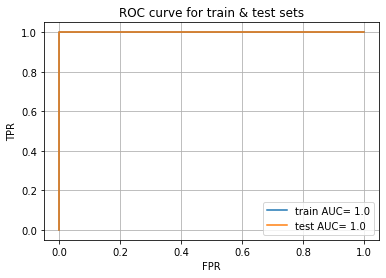

------------------------------------------------------------------------------
                                    Train & Test Confusion Matrices


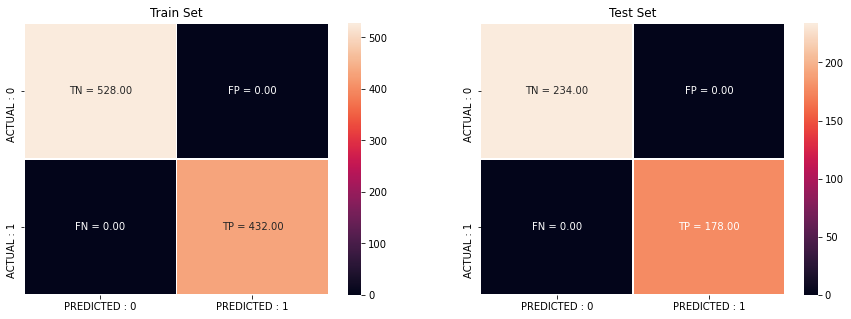

In [88]:
roc_curve_confusion_matrix(svc)

In [ ]:
# These scores are the best

# <font color="red">Summarization<font>

In [90]:
x = PrettyTable(["Machine Learning Model","f1-score"])
x.add_row([" Model-1: KNN ", "0.998"])
x.add_row([" Model-2: Logistic Regression using SGD Classifier ", "0.985"])
x.add_row([" Model-3: SVC ", "1.0"])
print(x)

+-----------------------------------------------------+----------+
|                Machine Learning Model               | f1-score |
+-----------------------------------------------------+----------+
|                     Model-1: KNN                    |  0.998   |
|  Model-2: Logistic Regression using SGD Classifier  |  0.985   |
|                     Model-3: SVC                    |   1.0    |
+-----------------------------------------------------+----------+


In [ ]:
# Let's consider SVC as our final and best model and proceed towards deployment

In [ ]:
# Firstly, let's save our model

In [91]:
pickle_out = open("bank_note_classifier.pkl","wb")
pickle.dump(svc,pickle_out)
pickle_out.close()

In [7]:
# Storing the Standard scaler for standardization of production inputs:-
pickle_scaler_out = open("std_scaler.pkl","wb")
pickle.dump(scaler,pickle_scaler_out)
pickle_scaler_out.close()

In [ ]:
# performing a few predictions:-

In [105]:
inp = scaler.transform([[-3.591600,-6.22850,10.23890,-1.154300]])
print(inp)
svc.predict(inp)

[[-1.40719022 -1.42798013  2.1457059   0.01714328]]


array([1], dtype=int64)

In [ ]:
# the above note is fake

In [106]:
inp = scaler.transform([[1.684900,8.74890,-1.26410,-1.385800]])
print(inp)
svc.predict(inp)

[[ 0.45422489  1.1542248  -0.61875285 -0.09125796]]


array([0], dtype=int64)

In [ ]:
#the above note is real

In [107]:
inp = scaler.transform([[0.009661,3.56120,-4.40700,-4.410300]])
print(inp)
svc.predict(inp)

[[-0.13675685  0.25983027 -1.37407037 -1.5074978 ]]


array([1], dtype=int64)

In [ ]:
# the above note is fake

In [ ]:
# Dataset credits: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data
# Additional references: https://www.youtube.com/playlist?list=PLZoTAELRMXVNKtpy0U_Mx9N26w8n0hIbs